In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import cv2
import os
import string
import glob
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, SpatialDropout2D, BatchNormalization, Input,Activation, Dense, Flatten
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import plot_model
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.models import Model,save_model

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Labels
train_path = "/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train"
labels = []
alphabet = list(string.ascii_uppercase)
labels.extend(alphabet)
labels.extend(["del", "nothing", "space"])
print(labels)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']


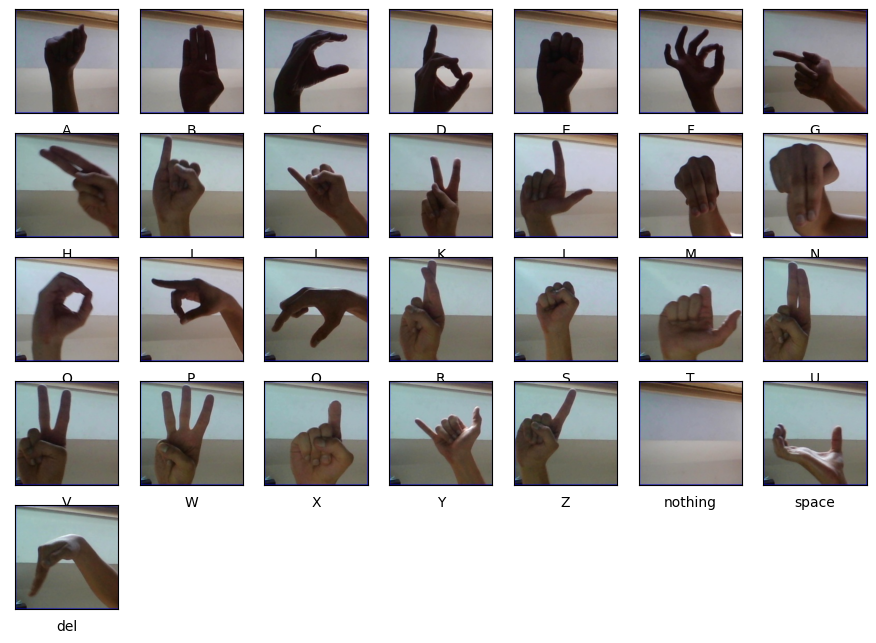

In [3]:
train_dir = '../input/asl-alphabet/asl_alphabet_train/asl_alphabet_train'
test_dir = '../input/asl-alphabet/asl_alphabet_test/asl_alphabet_test'
classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 
           'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 
           'W', 'X', 'Y', 'Z', 'nothing', 'space', 'del']
plt.figure(figsize=(11, 11))
for i in range (0,29):
    plt.subplot(7,7,i+1)
    plt.xticks([])
    plt.yticks([])
    path = train_dir + "/{0}/{0}1.jpg".format(classes[i])
    img = plt.imread(path)
    plt.imshow(img)
    plt.xlabel(classes[i])

In [4]:
list_path = []
list_labels = []
for label in labels:
    label_path = os.path.join(train_dir, label, "*")
    image_files = glob.glob(label_path)
    
    sign_label = [label] * len(image_files)
    
    list_path.extend(image_files)
    list_labels.extend(sign_label)

df = pd.DataFrame({"image_path": list_path, "label": list_labels})
df

,image_path,label
0,../input/asl-alphabet/asl_alphabet_train/asl_a...,A
1,../input/asl-alphabet/asl_alphabet_train/asl_a...,A
2,../input/asl-alphabet/asl_alphabet_train/asl_a...,A
3,../input/asl-alphabet/asl_alphabet_train/asl_a...,A
4,../input/asl-alphabet/asl_alphabet_train/asl_a...,A
...,...,...
86995,../input/asl-alphabet/asl_alphabet_train/asl_a...,space
86996,../input/asl-alphabet/asl_alphabet_train/asl_a...,space
86997,../input/asl-alphabet/asl_alphabet_train/asl_a...,space
86998,../input/asl-alphabet/asl_alphabet_train/asl_a...,space


In [5]:
image_generator=ImageDataGenerator(rescale=1/255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
image_generator=ImageDataGenerator(rescale=1/255)

In [6]:
# Split Dataset to Train 0.7, Val 0.15, and Test 0.15
X_train, X_test, y_train, y_test = train_test_split(df["image_path"], df["label"], 
    test_size=0.15, 
    random_state=2023, 
    shuffle=True, 
    stratify=df["label"]
)

In [7]:
data_train = pd.DataFrame({"image_path": X_train,"label": y_train})
data_train

,image_path,label
19553,../input/asl-alphabet/asl_alphabet_train/asl_a...,G
9314,../input/asl-alphabet/asl_alphabet_train/asl_a...,D
25312,../input/asl-alphabet/asl_alphabet_train/asl_a...,I
56151,../input/asl-alphabet/asl_alphabet_train/asl_a...,S
66845,../input/asl-alphabet/asl_alphabet_train/asl_a...,W
...,...,...
58472,../input/asl-alphabet/asl_alphabet_train/asl_a...,T
15926,../input/asl-alphabet/asl_alphabet_train/asl_a...,F
82033,../input/asl-alphabet/asl_alphabet_train/asl_a...,nothing
39954,../input/asl-alphabet/asl_alphabet_train/asl_a...,N


In [8]:
X_train, X_val, y_train, y_val = train_test_split(
    data_train["image_path"], data_train["label"],
    test_size=0.15/0.70,
    random_state=2023,
    shuffle=True,
    stratify=data_train["label"]
)

In [9]:
data_train = pd.DataFrame({"image_path": X_train, "label": y_train})
data_train

,image_path,label
51901,../input/asl-alphabet/asl_alphabet_train/asl_a...,R
51887,../input/asl-alphabet/asl_alphabet_train/asl_a...,R
5050,../input/asl-alphabet/asl_alphabet_train/asl_a...,B
29446,../input/asl-alphabet/asl_alphabet_train/asl_a...,J
58405,../input/asl-alphabet/asl_alphabet_train/asl_a...,T
...,...,...
47111,../input/asl-alphabet/asl_alphabet_train/asl_a...,P
83611,../input/asl-alphabet/asl_alphabet_train/asl_a...,nothing
67329,../input/asl-alphabet/asl_alphabet_train/asl_a...,W
85296,../input/asl-alphabet/asl_alphabet_train/asl_a...,space


In [10]:
data_val = pd.DataFrame({"image_path": X_val,"label": y_val})
data_val

,image_path,label
24961,../input/asl-alphabet/asl_alphabet_train/asl_a...,I
71053,../input/asl-alphabet/asl_alphabet_train/asl_a...,X
73637,../input/asl-alphabet/asl_alphabet_train/asl_a...,Y
72875,../input/asl-alphabet/asl_alphabet_train/asl_a...,Y
40669,../input/asl-alphabet/asl_alphabet_train/asl_a...,N
...,...,...
16474,../input/asl-alphabet/asl_alphabet_train/asl_a...,F
62741,../input/asl-alphabet/asl_alphabet_train/asl_a...,U
32281,../input/asl-alphabet/asl_alphabet_train/asl_a...,K
20451,../input/asl-alphabet/asl_alphabet_train/asl_a...,G


In [11]:
data_test = pd.DataFrame({"image_path": X_test,"label": y_test})
data_test

,image_path,label
73327,../input/asl-alphabet/asl_alphabet_train/asl_a...,Y
85482,../input/asl-alphabet/asl_alphabet_train/asl_a...,space
65607,../input/asl-alphabet/asl_alphabet_train/asl_a...,V
53903,../input/asl-alphabet/asl_alphabet_train/asl_a...,R
64425,../input/asl-alphabet/asl_alphabet_train/asl_a...,V
...,...,...
40578,../input/asl-alphabet/asl_alphabet_train/asl_a...,N
28949,../input/asl-alphabet/asl_alphabet_train/asl_a...,J
42094,../input/asl-alphabet/asl_alphabet_train/asl_a...,O
5425,../input/asl-alphabet/asl_alphabet_train/asl_a...,B


In [12]:
Training = image_generator.flow_from_dataframe(data_train,target_size=(64,64),batch_size=64,
                                               class_mode='categorical', directory="./", x_col="image_path",y_col="label")

Validation = image_generator.flow_from_dataframe(data_val , target_size=(64,64),batch_size=64,class_mode='categorical',
                                                 directory="./", x_col="image_path",y_col="label")

Test = image_generator.flow_from_dataframe(data_test,target_size=(64,64),batch_size=64,class_mode='categorical',
                                             directory="./", x_col="image_path",y_col="label")

Found 58103 validated image filenames belonging to 29 classes.
Found 15847 validated image filenames belonging to 29 classes.
Found 13050 validated image filenames belonging to 29 classes.


In [13]:
model = Sequential()

model.add(Conv2D(64, (3, 3), padding='same', input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), padding='same', input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(256, (3, 3), padding='same', input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dense(29, activation='softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 128)      0         
 2D)                                                             
                                                        

In [15]:
model.compile(optimizer = 'Adam' , loss = "categorical_crossentropy", metrics=["accuracy"])

In [16]:
train_step=Training.n//Training.batch_size
test_step=Test.n//Test.batch_size
valid_step =Validation.n//Validation.batch_size

num_epochs = 10

history = model.fit_generator(Training,
                                      steps_per_epoch=train_step,
                                      epochs=num_epochs, 
                                      validation_data=Validation,
                                      validation_steps=valid_step) 

/tmp/ipykernel_23/580191498.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(Training,


Epoch 1/10


2023-05-06 21:30:17.116715: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


907/907 [==============================] - 412s 442ms/step - loss: 0.8443 - accuracy: 0.7788 - val_loss: 1.1907 - val_accuracy: 0.7473
Epoch 2/10
907/907 [==============================] - 101s 112ms/step - loss: 0.1312 - accuracy: 0.9588 - val_loss: 0.3822 - val_accuracy: 0.8947
Epoch 3/10
907/907 [==============================] - 99s 109ms/step - loss: 0.0839 - accuracy: 0.9745 - val_loss: 0.3560 - val_accuracy: 0.9190
Epoch 4/10
907/907 [==============================] - 101s 111ms/step - loss: 0.0717 - accuracy: 0.9812 - val_loss: 0.7048 - val_accuracy: 0.8446
Epoch 5/10
907/907 [==============================] - 100s 110ms/step - loss: 0.0649 - accuracy: 0.9831 - val_loss: 6.4445 - val_accuracy: 0.4700
Epoch 6/10
907/907 [==============================] - 120s 132ms/step - loss: 0.0568 - accuracy: 0.9860 - val_loss: 0.6823 - val_accuracy: 0.8659
Epoch 7/10
907/907 [==============================] - 99s 109ms/step - loss: 0.0348 - accuracy: 0.9911 - val_loss: 0.0792 - val_accuracy

In [17]:
score = model.evaluate(Test)
print(score)

204/204 [==============================] - 68s 335ms/step - loss: 0.0998 - accuracy: 0.9756
[0.09982682019472122, 0.9755555391311646]


In [18]:
print(Test.filepaths[500])
print('--------------------------------------')
print(Test.labels[500])

./../input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/P/P245.jpg
--------------------------------------
15


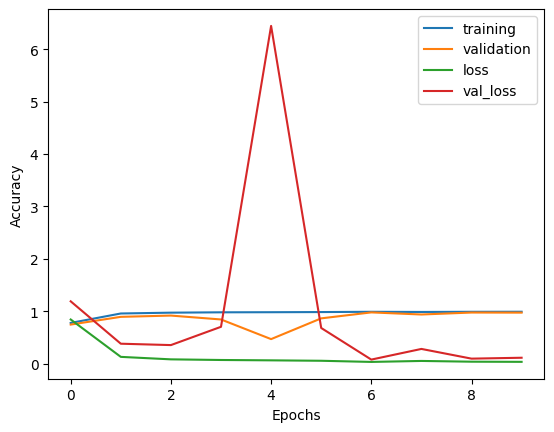

In [19]:
plt.plot(history.history['accuracy'],label='training')
plt.plot(history.history['val_accuracy'],label='validation')
plt.plot(history.history["loss"],label='loss')
plt.plot(history.history["val_loss"],label='val_loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

(64, 64, 3)
(1, 64, 64, 3)
1/1 [==============================] - 0s 241ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]]


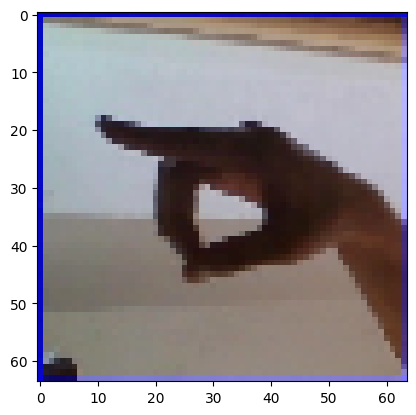

In [20]:
test_image=image.load_img('./../input/asl-alphabet/asl_alphabet_train/asl_alphabet_train/P/P245.jpg',
                 target_size=(64,64))
plt.imshow(test_image)

#plt.title('With Mask)
# Convert image to array
test_image=image.img_to_array(test_image)
print(test_image.shape)

# model input is in the from of 4D (batch_size,row,column,channel=3 for 'rgb')
test_image=test_image.reshape(1,64,64,3)
print(test_image.shape)

# Making a prediction
result=model.predict(test_image)
print(result)



In [21]:
data_test['image_path'][:1]

73327    ../input/asl-alphabet/asl_alphabet_train/asl_a...
Name: image_path, dtype: object

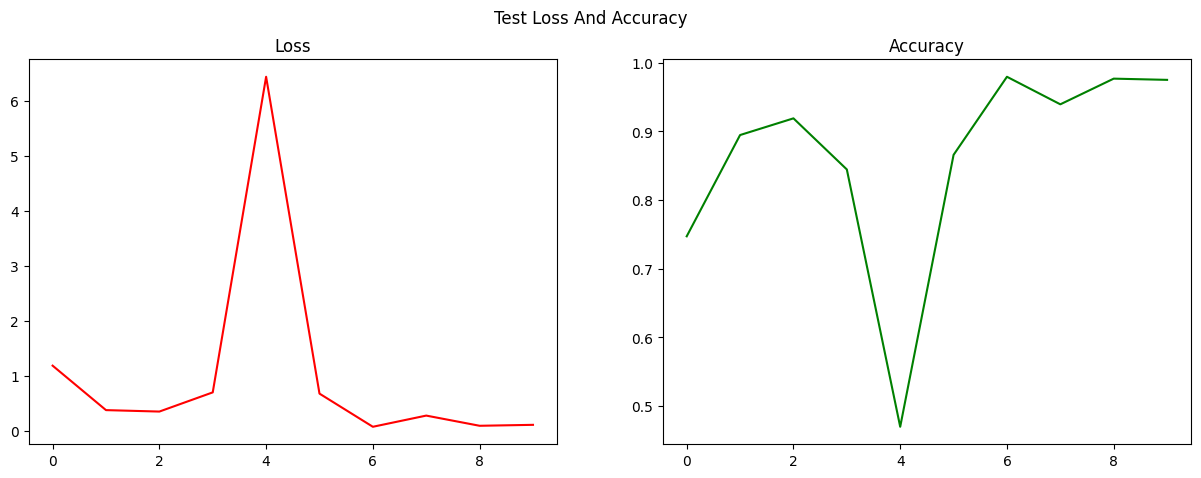

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5), sharey=False)
fig.suptitle('Test Loss And Accuracy')

sns.lineplot(ax=ax[0], data=history.history['val_loss'], color='r')
ax[0].set_title('Loss')

sns.lineplot(ax=ax[1], data=history.history['val_accuracy'], color='g')
ax[1].set_title('Accuracy')

plt.show()

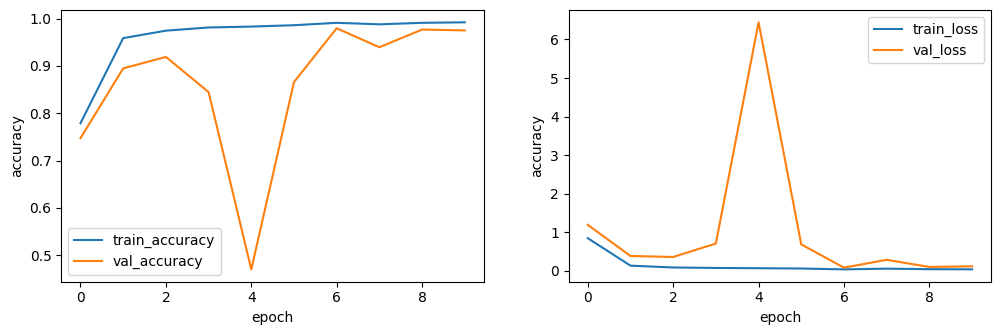

In [23]:
def plot_results(model):
    plt.figure(figsize=(12, 12))
    plt.subplot(3, 2, 1)
    plt.plot(history.history['accuracy'], label = 'train_accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend()
    plt.subplot(3, 2, 2)
    plt.plot(history.history['loss'], label = 'train_loss')
    plt.plot(history.history['val_loss'], label = 'val_loss')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend()
    plt.show()


    
plot_results(model)